# 4. Linear Models for Classification
## 4.2. Probabilistic Generative Models

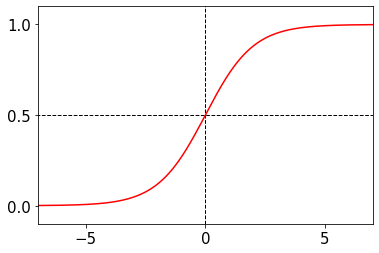

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from base_module.sigmoid_feature import Sigmoid_Feature
%matplotlib inline

F_size = 15
feature = Sigmoid_Feature(mean=[0.],std=1.)
x = np.arange(-10, 10, 0.01)
y = feature.transform(x)[:,1]
plt.close()
plt.axvline(x=0, ymin=0, ymax=1, linewidth=1,linestyle='--',color = 'k')
plt.axhline(y=0.5,xmin=-10,xmax=10,linewidth=1,linestyle='--',color = 'k')
plt.plot(x, y,color='r')
plt.xlim(-7,7)
plt.ylim(-0.1,1.1)
plt.xticks([-5,0,5],fontsize=F_size)
plt.yticks([0,0.5,1],fontsize=F_size)
plt.show()

## 4.3.2 Logistic regression

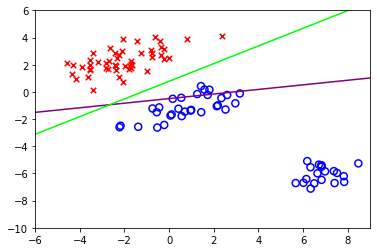

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from classifier.least_squares_classifier import Least_Squares_Classifier
from classifier.logistic_regression import Logistic_Regression
from base_module.poly_feature import Poly_Feature

N = 100  #the number of noise
outlier = 20 # the number of outlier (<N)



# Creating training data
cov = [[2.5,1], [1,0.8]]
cls1 = np.random.multivariate_normal([-2,2.5], cov, int(N/2))
cls2 = np.vstack((np.random.multivariate_normal([1,-1], cov, int(N/2)-outlier)\
                  ,np.random.multivariate_normal([7,-6], [[0.5,0.2],[0.2,0.5]], outlier)))
# Create the design_matrix
feature = Poly_Feature(1)
X_train = feature.transform(np.vstack((cls1,cls2)))


# Creating test data
X,Y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
test_x = np.array([X.ravel(), Y.ravel()]).reshape(2,-1).T
X_test = feature.transform(test_x)


'''-----Least Squares Method-----'''
#1-of-K encoding
Teacher_T_matrix = np.vstack(([[1,0]]*cls1.shape[0],[[0,1]]*cls2.shape[0]))
least_squares = Least_Squares_Classifier()
least_squares.fit(X_train,Teacher_T_matrix)
z_ls = least_squares.predict(X_test)


'''-----logistic regression-----'''
#NOTICE: train_t is not 1-of-K encoding
train_t = np.hstack((np.ones(cls1.shape[0]),np.zeros(cls2.shape[0])))
logistic_regression = Logistic_Regression()
logistic_regression.fit(X_train,train_t)
z_lr = logistic_regression.predict(X_test)


#plotting training data
plt.scatter(cls1.T[0],cls1.T[1],c='r',marker='x',label="class1",s=30,linewidth=1.5)
plt.scatter(cls2.T[0],cls2.T[1], facecolor="none", edgecolor="b",label="class2",s=50,linewidth=1.5)

#plotting test data
plt.contour(X,Y,z_ls.reshape(X.shape),[0],colors='purple')
plt.contour(X,Y,z_lr.reshape(X.shape),[0],colors='lime')

plt.xlim(-6, 9)
plt.ylim(-10, 6)
plt.show()

## 4.3.4 Multiclass logistic regression

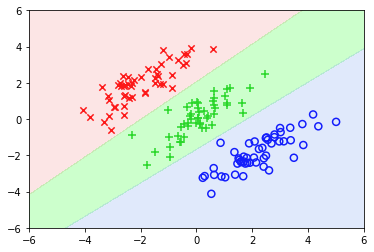

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from classifier.softmax_regression import Softmax_Regression
from base_module.poly_feature import Poly_Feature

N = 150  # The number of test data
K = 3    # The number of class


'''-------Training Data------'''
cov = [[1.0,0.8], [0.8,1.0]]
cls1 = np.random.multivariate_normal([-2,2], cov, int(N/K))
cls2 = np.random.multivariate_normal([0,0], cov, int(N/K))
cls3 = np.random.multivariate_normal([2,-2], cov, int(N/K))
feature = Poly_Feature(1)
PHI_train = feature.transform(np.vstack((cls1,cls2,cls3)))

#Creating Label Matrix T
T_train = np.vstack(([[1,0,0]]*cls1.shape[0],[[0,1,0]]*cls2.shape[0],[[0,0,1]]*cls3.shape[0]))

'''----------Test Data------------'''
x = np.arange(-10,10,0.01)
y = np.arange(-10,10,0.01)
X,Y = np.meshgrid(x,y)
test_x = np.array([X.ravel(), Y.ravel()]).reshape(2,-1).T
X_test = feature.transform(test_x)


'''-------logistic regression-------'''
model = Softmax_Regression()
model.fit(PHI_train,T_train)
Z = model.predict(X_test)


#Plotting data
plt.scatter(cls1.T[0],cls1.T[1],c='r',marker='x',label="class1",s=40,linewidth=1.5)
plt.scatter(cls2.T[0], cls2.T[1] , color='limegreen',marker='+',linewidth=1.5,s=60)
plt.scatter(cls3.T[0], cls3.T[1] ,facecolor="none", edgecolor="b",label="class2",s=50,linewidth=1.5)

#Drawing area
plt.contourf(X,Y, Z.reshape(X.shape), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]),colors=['lightcoral','lime','cornflowerblue'])

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

## 4.4. The Laplace Approximation

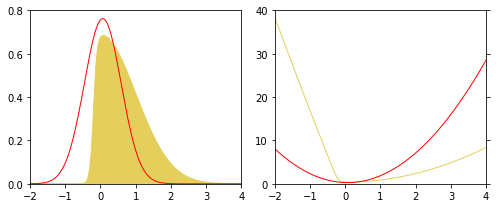

In [4]:
import numpy as np
from base_module import *
import matplotlib.pyplot as plt
from scipy import integrate


def pdf(z):
    gaussian_pdf = Gaussian_Feature(variance=1).gauss_function(z,mean=0)
    sigmoid_pdf = Sigmoid_Feature(std=1).sigmoid_function(20 * z + 4,mean=0)
    return gaussian_pdf * sigmoid_pdf



z = np.linspace(-2,20,470)
nomalize_facter = integrate.quad(pdf, -np.inf, np.inf)[0]
pz = pdf(z) / nomalize_facter

log_fz = np.log(pdf(z))
z0_index = np.argmax(pdf(z))
z0 = z[z0_index]# mode
A = -np.gradient(np.gradient(log_fz,z),z)[z0_index]
qz = np.sqrt(0.5 * A /np.pi) * np.exp(-0.5 * A * (z-z0)**2)

plt.figure(figsize=(7, 3))
plt.subplot(1,2,1)
plt.fill_between(z,pz,color='#e5cf5c')
plt.plot(z,qz,color='r',linewidth=1)
plt.xlim(-2,4)
plt.ylim(0,0.8)
plt.yticks(np.arange(0,1,0.2))

plt.subplot(1,2,2)
plt.plot(z,-np.log(pz),color='#e5cf5c',linewidth=1)
plt.plot(z,-np.log(qz),color='r',linewidth=1)
plt.xlim(-2,4)
plt.ylim(0,40)
plt.yticks(np.arange(0,41,10))
plt.tick_params(left=True, right=True)


plt.tight_layout()
plt.show()